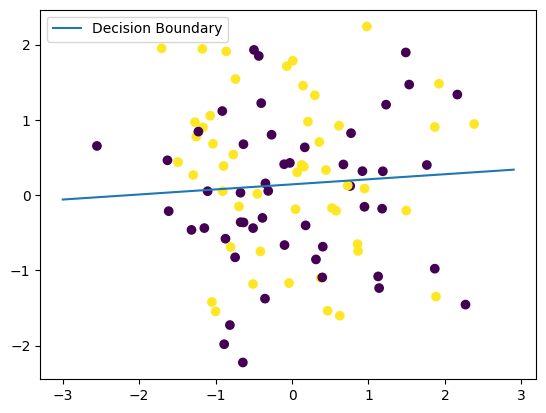

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costFunction(theta, X, y):
    m = len(y)
    J = 0
    grad = np.zeros(theta.shape)
    
    h = sigmoid(np.dot(X, theta))
    J = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    grad = (1/m) * np.dot(X.T, (h-y))
    
    return J, grad

def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        J_history[i], grad = costFunction(theta, X, y)
        theta = theta - alpha*grad
        
    return theta, J_history

# 生成样本数据
np.random.seed(0)
X = np.random.randn(100, 2)
ones = np.ones((100, 1))
X = np.hstack((ones, X))
y = np.random.randint(0, 2, size=(100,1))

# 初始化theta
initial_theta = np.zeros((X.shape[1], 1))

# 梯度下降
alpha = 0.1
num_iters = 1000
theta, J_history = gradientDescent(X, y, initial_theta, alpha, num_iters)

# 绘制决策边界
x1 = np.arange(-3, 3, 0.1)
x2 = -(theta[0]+theta[1]*x1)/theta[2]
plt.plot(x1, x2, label='Decision Boundary')
plt.scatter(X[:, 1], X[:, 2], c=y.flatten())
plt.legend()
plt.show()
